In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import cv2
from skimage import graph
import tifffile

In [2]:
def padd_to_proper(data, target):
    padded_image = np.pad(data[:,53:-54,6:-10], ((0, 128-123), (0,0), (0, 0)), mode='constant')
    padded_target = np.pad(target[:,53:-54,6:-10], ((0, 128-123), (0,0), (0, 0)), mode='constant') 
    return padded_image[:,:,:-21], padded_target[:,:,:-21]

In [3]:
def coloring(data):
    colored = np.zeros((data.shape[0],data.shape[1],data.shape[2],3), dtype='uint8')
    
    for d in range(data.shape[0]):
        _i = cv2.cvtColor(data[d], cv2.COLOR_GRAY2BGR) 
        colored [d] = _i
    return colored

In [4]:
data_path ='data/registered/output/fixed_low_res.tif'
data = tifffile.imread(data_path)
target_path = 'data/registered/output/registered_mask.tif'
target = tifffile.imread(target_path)

data , target = padd_to_proper(data,target)
data = data [1:117,1:-1,21:109].astype('uint8')
target = target[1:117,1:-1,21:109]

In [6]:
n=0
colored_data = coloring(data)
img = data[n]
cl_img = colored_data[n]
GrabCut = np.zeros_like(data)

for h in range (data.shape[0]):
    img = data[h]
    img_color = colored_data[h]
    mask = np.zeros_like(img)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    #rect = (50,50,450,290)
    #cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

    mask[img > 220] = 1

    mask, bgdModel, fgdModel = cv2.grabCut(cl_img, mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    GrabCut[h] = mask2

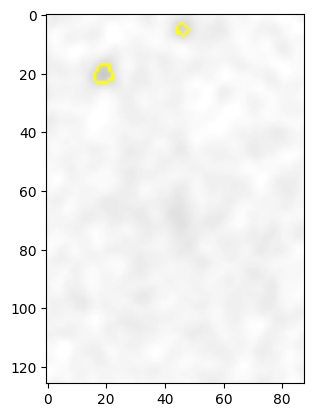

In [7]:
n=30
plt.imshow(skimage.segmentation.mark_boundaries(colored_data[n],GrabCut[n]))

In [ ]:
tifffile.imwrite('GrabCut.tif',GrabCut)